#  **AI-Based Predictive Modeling of Individual Carbon Footprints Using Behavioral and Energy Consumption Data**

### 1. Data cleaning and preprocessing

#### Dataset : https://www.kaggle.com/datasets/dumanmesut/individual-carbon-footprint-calculation?resource=download

In [1]:
import pandas as pd
import numpy as np
import ast

In [2]:
data=pd.read_csv("Carbon Emission.csv")

In [3]:
data.columns


Index(['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
       'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill',
       'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km',
       'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour',
       'How Many New Clothes Monthly', 'How Long Internet Daily Hour',
       'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission'],
      dtype='object')

In [4]:
data.head(5)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [5]:
data.tail()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,NaN,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574
9999,obese,male,pescatarian,twice a day,wood,private,electric,sometimes,115,never,9952,small,4,11,6,0,Sometimes,"['Plastic', 'Glass', 'Metal']","['Oven', 'Grill', 'Airfryer']",826


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [7]:
data.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,173.875200,2031.485900,4.024600,12.139200,25.109000,11.889100,2269.147300
std,72.234018,2769.715597,1.990375,7.106369,14.698725,7.277218,1017.675247
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.000000
max,299.000000,9999.000000,7.000000,24.000000,50.000000,24.000000,8377.000000


In [8]:
print(data.isna().sum())

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64


In [9]:
# Replace Blank with NaN value
data=data.replace(r'^\s*$', np.nan, regex=True)

In [10]:
data['Vehicle Type'].unique()

array([nan, 'petrol', 'diesel', 'hybrid', 'lpg', 'electric'], dtype=object)

In [11]:
# Vehicle type has missing data so, fill with None

data['Vehicle Type']=data['Vehicle Type'].fillna('None')

In [12]:
# Another Time check each columns

print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Body Type                        0
Sex                              0
Diet                             0
How Often Shower                 0
Heating Energy Source            0
Transport                        0
Vehicle Type                     0
Social Activity                  0
Monthly Grocery Bill             0
Frequency of Traveling by Air    0
Vehicle Monthly Distance Km      0
Waste Bag Size                   0
Waste Bag Weekly Count           0
How Long TV PC Daily Hour        0
How Many New Clothes Monthly     0
How Long Internet Daily Hour     0
Energy efficiency                0
Recycling                        0
Cooking_With                     0
CarbonEmission                   0
dtype: int64


#### Clean Categorical Columns

To Avoid problems like 'Male','male','M' → all become 'male'.
'Petrol', 'petrol ', ' PETROL' → all become 'petrol'

In [13]:
# Clean categorical columns

def clean_text(x):
    return x.strip().lower() if isinstance(x, str) else x

categorical_cols = [
    "Body Type","Sex","Diet","How Often Shower","Heating Energy Source",
    "Transport","Vehicle Type","Social Activity","Waste Bag Size",
    "Frequency of Traveling by Air","Energy efficiency"
]

for column in categorical_cols:
  data[column] = data[column].apply(clean_text)

In [14]:
for column in categorical_cols:
  print(data[column].unique())

['overweight' 'obese' 'underweight' 'normal']
['female' 'male']
['pescatarian' 'vegetarian' 'omnivore' 'vegan']
['daily' 'less frequently' 'more frequently' 'twice a day']
['coal' 'natural gas' 'wood' 'electricity']
['public' 'walk/bicycle' 'private']
['none' 'petrol' 'diesel' 'hybrid' 'lpg' 'electric']
['often' 'never' 'sometimes']
['large' 'extra large' 'small' 'medium']
['frequently' 'rarely' 'never' 'very frequently']
['no' 'sometimes' 'yes']


#### The columns ‘Recycling’ and ‘Cooking_With’ contained values stored as string representations of lists

These steps transformed text-based list values into clean, interpretable 0/1 features, making the data suitable for machine learning algorithms.

In [15]:
list_columns_to_process = ['Recycling', 'Cooking_With']

In [16]:
for column in list_columns_to_process:
  print(data[column].unique() )

["['Metal']" "['Paper', 'Plastic', 'Glass', 'Metal']" "['Paper']"
 "['Paper', 'Glass', 'Metal']" '[]' "['Paper', 'Plastic', 'Glass']"
 "['Glass']" "['Paper', 'Plastic']" "['Plastic']"
 "['Plastic', 'Glass', 'Metal']" "['Paper', 'Plastic', 'Metal']"
 "['Paper', 'Glass']" "['Paper', 'Metal']" "['Glass', 'Metal']"
 "['Plastic', 'Glass']" "['Plastic', 'Metal']"]
["['Stove', 'Oven']" "['Stove', 'Microwave']" "['Oven', 'Microwave']"
 "['Microwave', 'Grill', 'Airfryer']" "['Oven']"
 "['Stove', 'Oven', 'Microwave']" "['Grill', 'Airfryer']" "['Stove']"
 "['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']"
 "['Oven', 'Microwave', 'Grill', 'Airfryer']"
 "['Stove', 'Grill', 'Airfryer']" "['Oven', 'Grill', 'Airfryer']"
 "['Microwave']" "['Stove', 'Oven', 'Grill', 'Airfryer']"
 "['Stove', 'Microwave', 'Grill', 'Airfryer']" '[]']


In [17]:
# Convert String list columns

def parse_list(x):
    try:
        v = ast.literal_eval(x) if isinstance(x, str) else x
        return v if isinstance(v, list) else []
    except:
        return []

In [18]:
# Filter for columns that actually exist in the DataFrame

for c in list_columns_to_process:
    data[c] = data[c].apply(parse_list)

for c in list_columns_to_process:
    items = sorted({item for sub in data[c] for item in sub})
    for it in items:
        data[f"{c}_{it.lower()}"] = data[c].apply(lambda xs, it=it: 1 if it in xs else 0)

data = data.drop(columns=list_columns_to_process)

In [19]:
# Numerical Columns
num_cols = [
    "Monthly Grocery Bill","Vehicle Monthly Distance Km",
    "How Many New Clothes Monthly","How Long TV PC Daily Hour",
    "How Long Internet Daily Hour","Waste Bag Weekly Count"
]

In [20]:
for c in num_cols:
    data[c] = pd.to_numeric(data[c], errors="coerce")
    data[c] = data[c].fillna(data[c].median())
     # If a value cannot be converted to a number dont throw an error instead,set it as NaN

In [21]:
# Outlier Handling
for c in num_cols + ["CarbonEmission"]:
    q1, q3 = data[c].quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    data[c] = data[c].clip(low, high)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Body Type                      10000 non-null  object 
 1   Sex                            10000 non-null  object 
 2   Diet                           10000 non-null  object 
 3   How Often Shower               10000 non-null  object 
 4   Heating Energy Source          10000 non-null  object 
 5   Transport                      10000 non-null  object 
 6   Vehicle Type                   10000 non-null  object 
 7   Social Activity                10000 non-null  object 
 8   Monthly Grocery Bill           10000 non-null  int64  
 9   Frequency of Traveling by Air  10000 non-null  object 
 10  Vehicle Monthly Distance Km    10000 non-null  float64
 11  Waste Bag Size                 10000 non-null  object 
 12  Waste Bag Weekly Count         10000 non-null  

In [23]:
# Check for existing columns
valid_columns = [col for col in categorical_cols if col in data.columns]

# Print valid columns to debug
print(valid_columns)

# One-Hot Encoding for valid categorical columns
data = pd.get_dummies(data, columns=valid_columns, drop_first=True)



['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type', 'Social Activity', 'Waste Bag Size', 'Frequency of Traveling by Air', 'Energy efficiency']


In [24]:
# Final Dataset

print(f"Data Shapes: {data.shape}")
data.head()

Data Shapes: (10000, 46)


,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Recycling_glass,Recycling_metal,Recycling_paper,...,Social Activity_often,Social Activity_sometimes,Waste Bag Size_large,Waste Bag Size_medium,Waste Bag Size_small,Frequency of Traveling by Air_never,Frequency of Traveling by Air_rarely,Frequency of Traveling by Air_very frequently,Energy efficiency_sometimes,Energy efficiency_yes
0,230,210.000,4,7,26,1,2238,0,1,0,...,True,False,True,False,False,False,False,False,False,False
1,114,9.000,3,9,38,5,1892,0,1,0,...,True,False,False,False,False,False,True,False,False,False
2,138,2472.000,1,14,47,6,2595,0,1,0,...,False,False,False,False,True,True,False,False,True,False
3,157,74.000,3,20,5,7,1074,1,1,1,...,False,True,False,True,False,False,True,False,True,False
4,266,6188.375,1,3,5,6,4613,0,0,1,...,True,False,True,False,False,False,False,True,False,True


In [25]:
data.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Recycling_glass,Recycling_metal,Recycling_paper,Recycling_plastic,Cooking_With_airfryer,Cooking_With_grill,Cooking_With_microwave,Cooking_With_oven,Cooking_With_stove
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000,10000.000000
mean,173.875200,1777.613225,4.024600,12.139200,25.109000,11.889100,2245.7222,0.497900,0.504700,0.49770,0.499700,0.499200,0.499200,0.507300,0.505,0.504100
std,72.234018,2200.677650,1.990375,7.106369,14.698725,7.277218,947.1203,0.500021,0.500003,0.50002,0.500025,0.500024,0.500024,0.499972,0.500,0.500008
min,50.000000,0.000000,1.000000,0.000000,0.000000,0.000000,306.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
25%,111.000000,69.000000,2.000000,6.000000,13.000000,6.000000,1538.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
50%,173.000000,823.000000,4.000000,12.000000,25.000000,12.000000,2080.0000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000,1.000000
75%,237.000000,2516.750000,6.000000,18.000000,38.000000,18.000000,2768.0000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000
max,299.000000,6188.375000,7.000000,24.000000,50.000000,24.000000,4613.0000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000


## Model Train

In [26]:
X = data.drop(columns=["CarbonEmission"])
y = data["CarbonEmission"]

In [28]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [29]:
# Data Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [30]:
def evaluate(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {"Model": name, "R2": r2, "MAE": mae, "RMSE": rmse}

results = []

In [31]:
# Random forest Model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    min_samples_leaf=2,
    max_features="sqrt"
)
rf.fit(X_train, y_train)
results.append(evaluate("RandomForest", y_test, rf.predict(X_test)))

In [33]:
# For XG Boost Model

from xgboost import XGBRegressor

xgb = XGBRegressor(
        n_estimators=1200,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    )
xgb.fit(X_train, y_train)
results.append(evaluate("XGBoost", y_test, xgb.predict(X_test)))

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [35]:
mlp = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(256,128,64),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        learning_rate_init=1e-3,
        max_iter=500,
        random_state=42,
        early_stopping=True,
        n_iter_no_change=20,
        validation_fraction=0.1
    ))
])

mlp.fit(X_train, y_train)
results.append(evaluate("NeuralNet (MLP)", y_test, mlp.predict(X_test)))

In [36]:
res = pd.DataFrame(results).sort_values("R2", ascending=False)
print("\n=== Model Comparison (Test Set) ===")
print(res.to_string(index=False))

best = res.iloc[0]
print("\nBest Model:", best["Model"])
print("R2:", round(best["R2"], 4), "| MAE:", round(best["MAE"], 2), "| RMSE:", round(best["RMSE"], 2))


=== Model Comparison (Test Set) ===
          Model       R2        MAE       RMSE
NeuralNet (MLP) 0.977311  94.468920 142.088177
        XGBoost 0.976399 101.732033 144.915890
   RandomForest 0.869369 266.175360 340.939868

Best Model: NeuralNet (MLP)
R2: 0.9773 | MAE: 94.47 | RMSE: 142.09


In [37]:
# RandomForest train/test R2
print("RandomForest Train R2:", r2_score(y_train, rf.predict(X_train)))
print("RandomForest Test  R2:", r2_score(y_test,  rf.predict(X_test)))
print()

# NeuralNet (MLP) train/test R2
print("NeuralNet (MLP) Train R2:", r2_score(y_train, mlp.predict(X_train)))
print("NeuralNet (MLP) Test  R2:", r2_score(y_test,  mlp.predict(X_test)))
print()

# XGBoost train/test R2 (only if xgb was trained)
print("XGBoost Train R2:", r2_score(y_train, xgb.predict(X_train)))
print("XGBoost Test  R2:", r2_score(y_test,  xgb.predict(X_test)))
print("XGBoost model not found (maybe not installed / skipped).")

RandomForest Train R2: 0.9577570326780366
RandomForest Test  R2: 0.8693690134000247

NeuralNet (MLP) Train R2: 0.9889577539591412
NeuralNet (MLP) Test  R2: 0.9773114619028036

XGBoost Train R2: 0.99947190284729
XGBoost Test  R2: 0.9763994216918945
XGBoost model not found (maybe not installed / skipped).


In [38]:
mlp_cv = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("mlp", MLPRegressor(hidden_layer_sizes=(256,128,64),
                         max_iter=500, early_stopping=True,
                         random_state=42))
])

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(mlp_cv, X, y, cv=cv, scoring="r2")

print("CV R2 scores:", scores)
print("Mean:", scores.mean(), "Std:", scores.std())

CV R2 scores: [0.977854   0.97826736 0.97815443 0.9793969  0.97795715]
Mean: 0.9783259672380954 Std: 0.0005547161665499295


##### We used Shap, for interpret machine learning models. SHAP assigns a contribution value to each feature for every prediction, showing how much each feature increases or decreases the predicted carbon footprint. This helps to understand model behavior, identify key drivers of carbon emissions, and make the results explainable and trustworthy.

In [39]:
import shap

###### we have multiple columns datatype bool, so we convert it to int. because shap only expects numeric type data like (int, float)

In [40]:
# Convert all bool columns to int
bool_cols = X_train.select_dtypes(include='bool').columns

X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

100%|===================| 1998/2000 [24:20<00:01]        

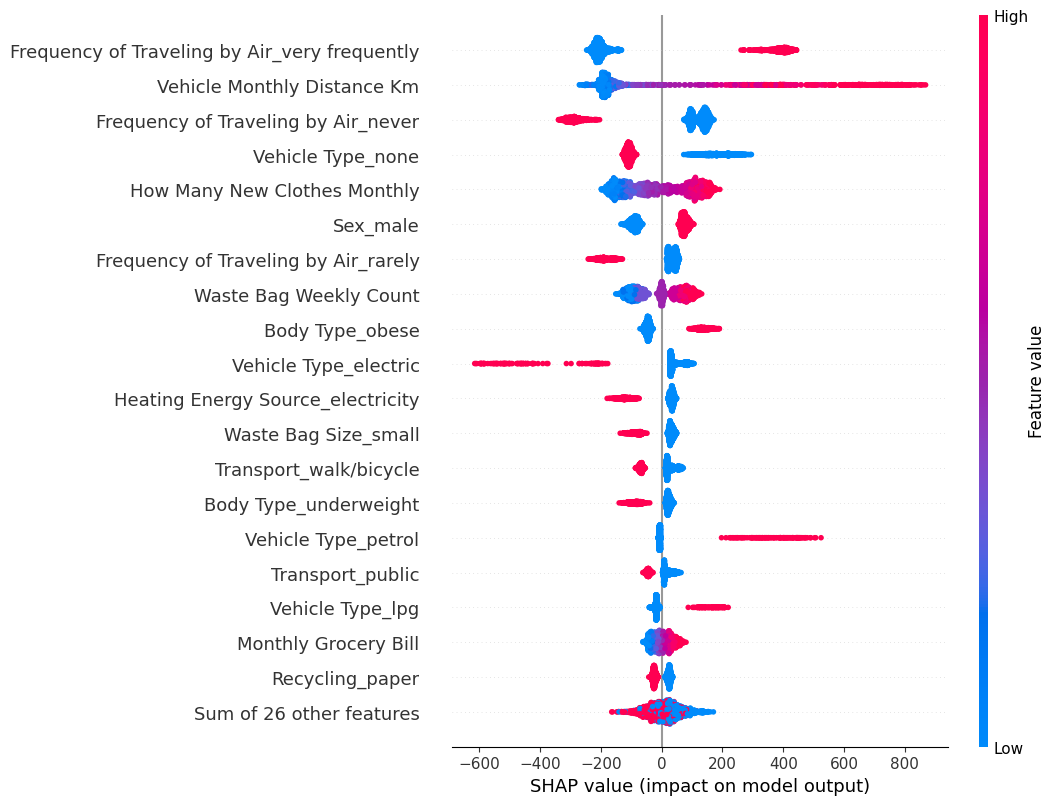


Top 20 features driving CarbonEmission:

Frequency of Traveling by Air_very frequently    252.374545
Vehicle Monthly Distance Km                      247.700630
Frequency of Traveling by Air_never              163.449536
Vehicle Type_none                                132.557706
How Many New Clothes Monthly                     102.458373
Sex_male                                          82.639900
Frequency of Traveling by Air_rarely              74.124022
Waste Bag Weekly Count                            70.962293
Body Type_obese                                   68.697249
Vehicle Type_electric                             63.964048
Heating Energy Source_electricity                 54.769299
Waste Bag Size_small                              45.668328
Transport_walk/bicycle                            43.555843
Body Type_underweight                             39.742536
Vehicle Type_petrol                               29.791699
Transport_public                                  28.57834

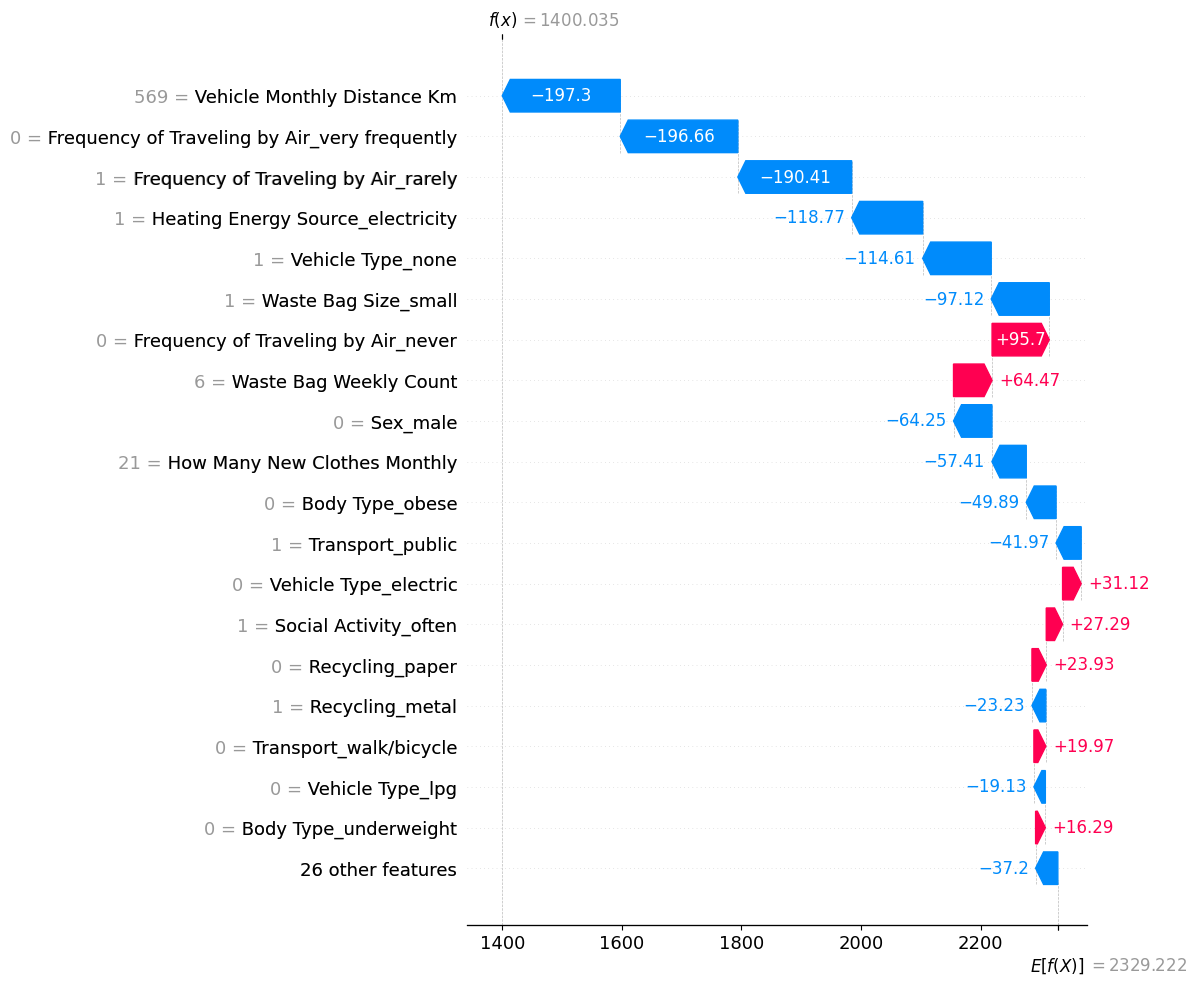

In [41]:
# Shap Explainer for Random Forest
explainer = shap.Explainer(rf, X_train)
sv = explainer(X_test)

# Top 20 features
shap.plots.beeswarm(sv, max_display=20)

# Top 20 most important SHAP features
imp = pd.Series(
    np.abs(sv.values).mean(axis=0),
    index=X_test.columns
).sort_values(ascending=False)

print("\nTop 20 features driving CarbonEmission:\n")
print(imp.head(20))

# Waterfall plot for the first prediction
shap.plots.waterfall(sv[0], max_display=20)

 99%|===================| 1988/2000 [02:15<00:00]        

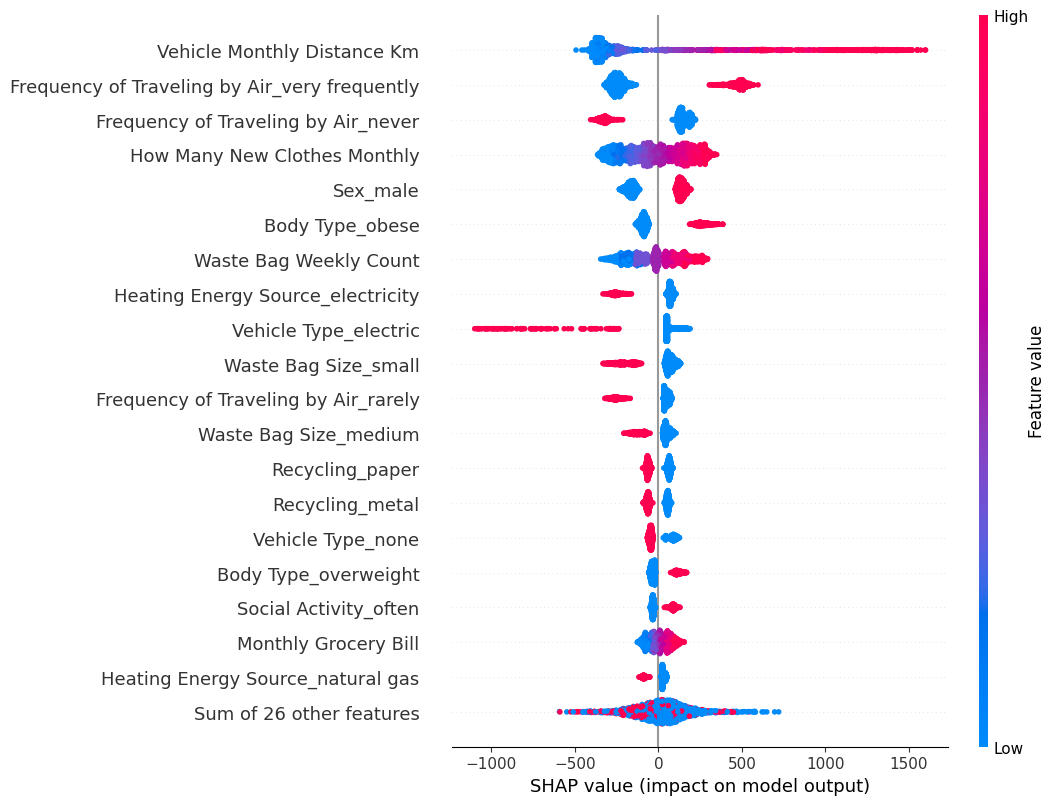


Top 20 features driving CarbonEmission:

Vehicle Monthly Distance Km                      433.689313
Frequency of Traveling by Air_very frequently    307.135173
Frequency of Traveling by Air_never              192.064286
How Many New Clothes Monthly                     161.888799
Sex_male                                         150.568294
Body Type_obese                                  133.402150
Waste Bag Weekly Count                           131.315005
Heating Energy Source_electricity                117.577173
Vehicle Type_electric                            107.223051
Waste Bag Size_small                             105.870773
Frequency of Traveling by Air_rarely             101.928037
Waste Bag Size_medium                             69.040210
Recycling_paper                                   63.585220
Recycling_metal                                   59.445923
Vehicle Type_none                                 58.603245
Body Type_overweight                              56.11977

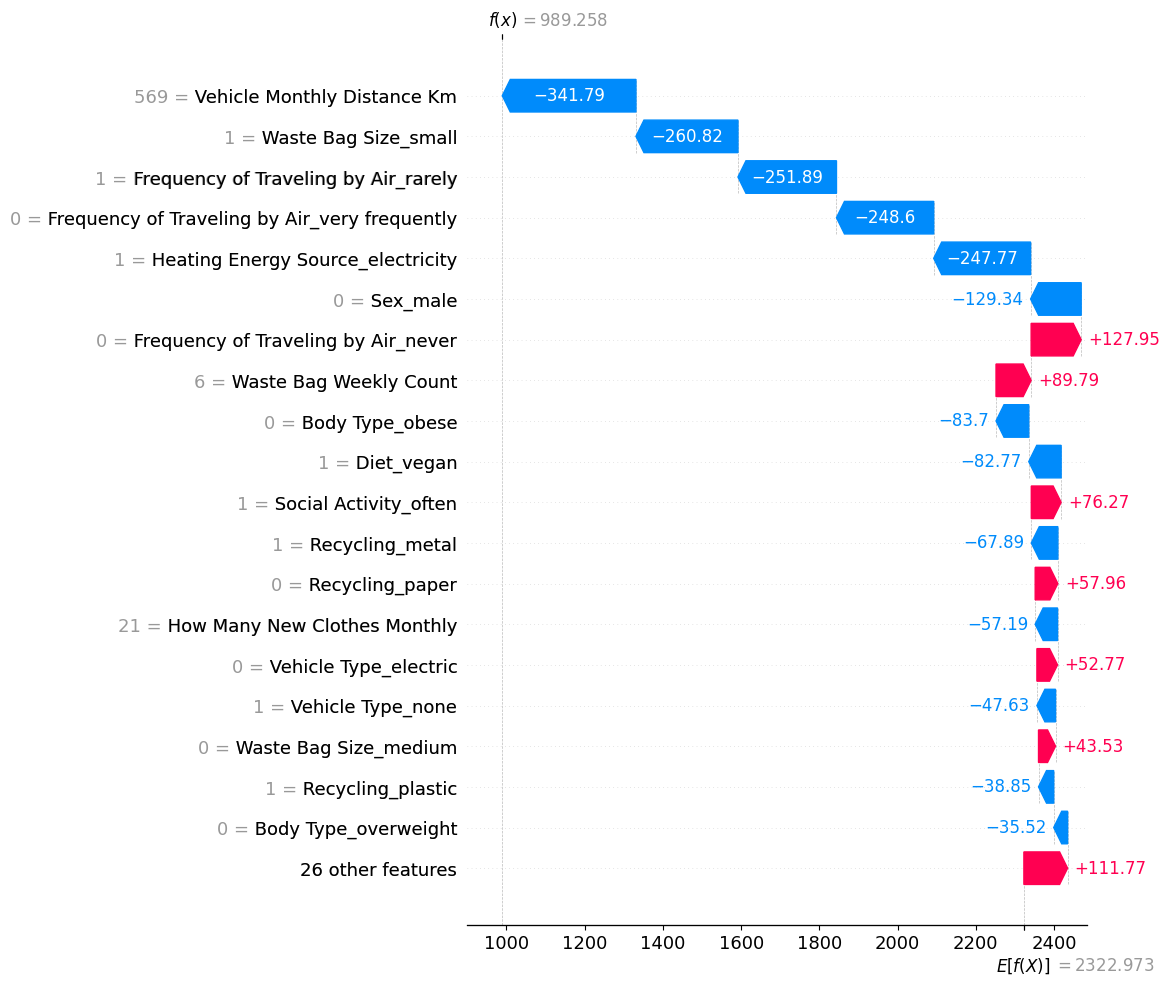

In [42]:
# Shap Explainer for XGBoost
explainer = shap.Explainer(xgb, X_train)
sv = explainer(X_test)

# Top 20 features
shap.plots.beeswarm(sv, max_display=20)

# Top 20 most important SHAP features
imp = pd.Series(
    np.abs(sv.values).mean(axis=0),
    index=X_test.columns
).sort_values(ascending=False)

print("\nTop 20 features driving CarbonEmission:\n")
print(imp.head(20))

# Waterfall plot for the first prediction
shap.plots.waterfall(sv[0], max_display=20)

##### SHAP can be applied to neural networks using KernelExplainer, but it is computationally very slow for large datasets because it treats the model as a “black box” and computes Shapley values using many perturbations. In contrast, tree-based models like Random Forest and XGBoost have optimized TreeExplainer, which is much faster. Therefore, for efficiency and clarity, we applied SHAP only to the tree-based models.

### Visualization

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Visualizations were used to understand key patterns in the carbon footprint dataset. Heatmaps, distribution plots, and scatter charts helped identify major contributing factors and relationships between variables. These analyses provided clear insights into the behaviors influencing carbon emissions.

In [44]:
data.columns = (
    data.columns
    .str.replace("_", " ", regex=False)
    .str.replace("-", " ", regex=False)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Monthly Grocery Bill                           10000 non-null  int64  
 1   Vehicle Monthly Distance Km                    10000 non-null  float64
 2   Waste Bag Weekly Count                         10000 non-null  int64  
 3   How Long TV PC Daily Hour                      10000 non-null  int64  
 4   How Many New Clothes Monthly                   10000 non-null  int64  
 5   How Long Internet Daily Hour                   10000 non-null  int64  
 6   CarbonEmission                                 10000 non-null  int64  
 7   Recycling glass                                10000 non-null  int64  
 8   Recycling metal                                10000 non-null  int64  
 9   Recycling paper                                1000

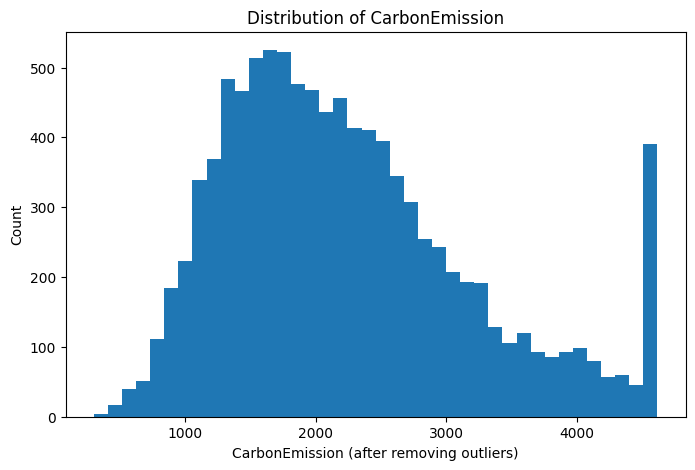

In [46]:
# Plot 1 about Carbon Emission after Removirng outliers

plt.figure(figsize=(8,5))
plt.hist(data["CarbonEmission"], bins=40)
plt.xlabel("CarbonEmission (after removing outliers)")
plt.ylabel("Count")
plt.title("Distribution of CarbonEmission")
plt.show()


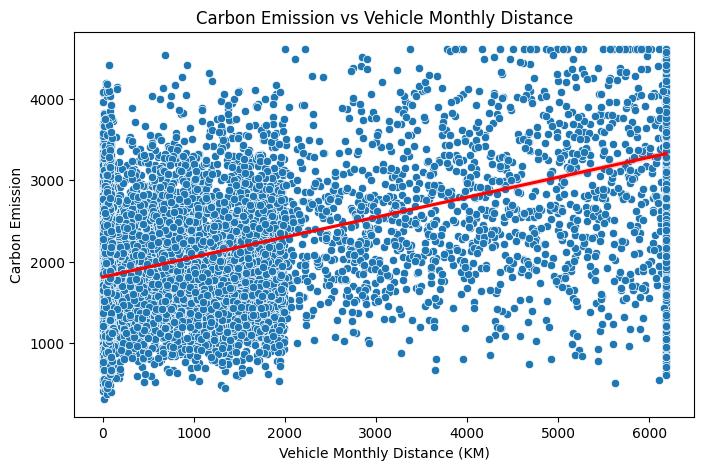

In [47]:
# Plot 2 : Carbon Emission vs Vehicle emission Km

plt.figure(figsize=(8,5))

sns.scatterplot(
    x="Vehicle Monthly Distance Km",
    y="CarbonEmission",
    data=data
)

sns.regplot(
    x="Vehicle Monthly Distance Km",
    y="CarbonEmission",
    data=data,
    scatter=False,
    color='red'
)

plt.title("Carbon Emission vs Vehicle Monthly Distance")
plt.xlabel("Vehicle Monthly Distance (KM)")
plt.ylabel("Carbon Emission")
plt.show()

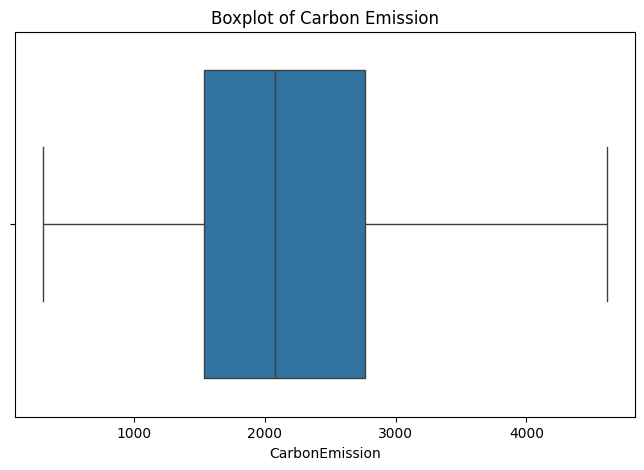

In [48]:
# Plot 4: Cheaking Outliers

plt.figure(figsize=(8,5))
sns.boxplot(x=data["CarbonEmission"])
plt.title("Boxplot of Carbon Emission")
plt.show()

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Monthly Grocery Bill                           10000 non-null  int64  
 1   Vehicle Monthly Distance Km                    10000 non-null  float64
 2   Waste Bag Weekly Count                         10000 non-null  int64  
 3   How Long TV PC Daily Hour                      10000 non-null  int64  
 4   How Many New Clothes Monthly                   10000 non-null  int64  
 5   How Long Internet Daily Hour                   10000 non-null  int64  
 6   CarbonEmission                                 10000 non-null  int64  
 7   Recycling glass                                10000 non-null  int64  
 8   Recycling metal                                10000 non-null  int64  
 9   Recycling paper                                1000

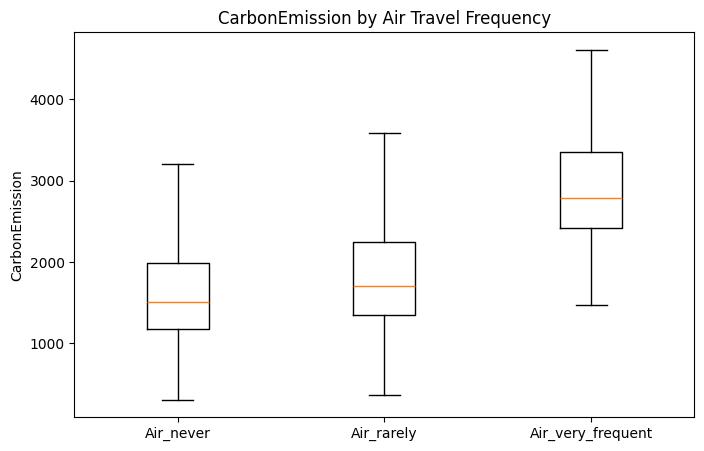

In [50]:
# Plot 5: CarbonEmission by Air Travel Frequency
data_plot = [
    data.loc[data["Frequency of Traveling by Air never"] == True, "CarbonEmission"],
    data.loc[data["Frequency of Traveling by Air rarely"] == True, "CarbonEmission"],
    data.loc[data["Frequency of Traveling by Air very frequently"] == True, "CarbonEmission"]
]

labels = ['Air_never', 'Air_rarely', 'Air_very_frequent']

plt.figure(figsize=(8,5))
plt.boxplot(data_plot, labels=labels, showfliers=False)
plt.ylabel("CarbonEmission")
plt.title("CarbonEmission by Air Travel Frequency")
plt.show()

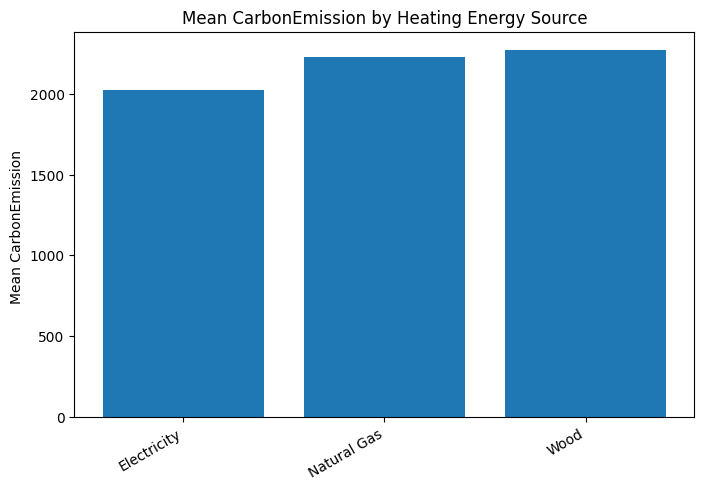

In [51]:
# Plot 6: Mean CarbonEmission by Heating Energy Source"
means = {
    "Electricity": data.loc[data["Heating Energy Source electricity"]==True, "CarbonEmission"].mean(),
    "Natural Gas": data.loc[data["Heating Energy Source natural gas"]==True, "CarbonEmission"].mean(),
    "Wood": data.loc[data["Heating Energy Source wood"]==True, "CarbonEmission"].mean()
}

# Plot
plt.figure(figsize=(8,5))
plt.bar(means.keys(), means.values())
plt.xticks(rotation=30, ha="right")
plt.ylabel("Mean CarbonEmission ")
plt.title("Mean CarbonEmission by Heating Energy Source")
plt.show()

In [52]:
data_plot=[
data.loc[data["Vehicle Type electric"]==True, "CarbonEmission"].mean(),
data.loc[data["Vehicle Type hybrid"]==True, "CarbonEmission"].mean(),
data.loc[data["Vehicle Type lpg"]==True, "CarbonEmission"].mean(),
data.loc[data["Vehicle Type none"]==True, "CarbonEmission"].mean(),
data.loc[data["Vehicle Type petrol"]==True, "CarbonEmission"].mean()
]

labels=["Electric", "Hybrid", "LPG", "None", "Petrol"]

C:\Users\USER\AppData\Local\Temp\ipykernel_15044\1404131484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels,y=data_plot,palette="Set2")


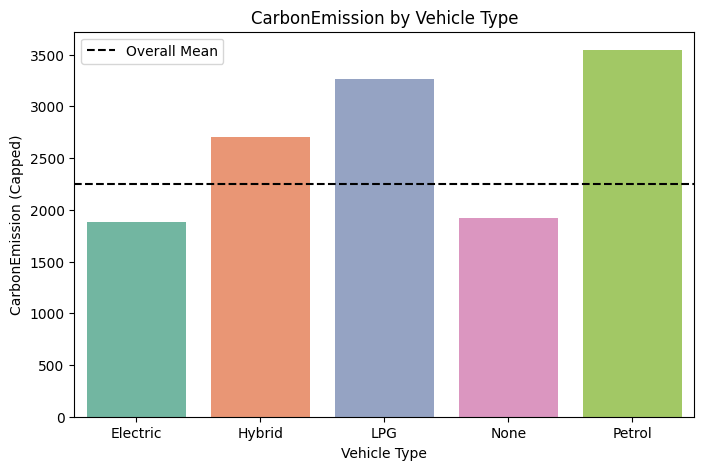

In [53]:
# Plot 7: CarbonEmission by Vehicle Type
plt.figure(figsize=(8,5))
sns.barplot(x=labels,y=data_plot,palette="Set2")

plt.axhline(data["CarbonEmission"].mean(), color='black', linestyle='--', label='Overall Mean')
plt.title("CarbonEmission by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("CarbonEmission (Capped)")
plt.legend()
plt.show()

In [54]:
data_plot=[
data.loc[data["Diet pescatarian"]==True, "CarbonEmission"].mean(),
data.loc[data["Diet vegan"]==True, "CarbonEmission"].mean(),
data.loc[data["Diet vegetarian"]==True, "CarbonEmission"].mean()
]

labels=["Pescatarian", "Vegan", "Vegetarian"]

C:\Users\USER\AppData\Local\Temp\ipykernel_15044\140531241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


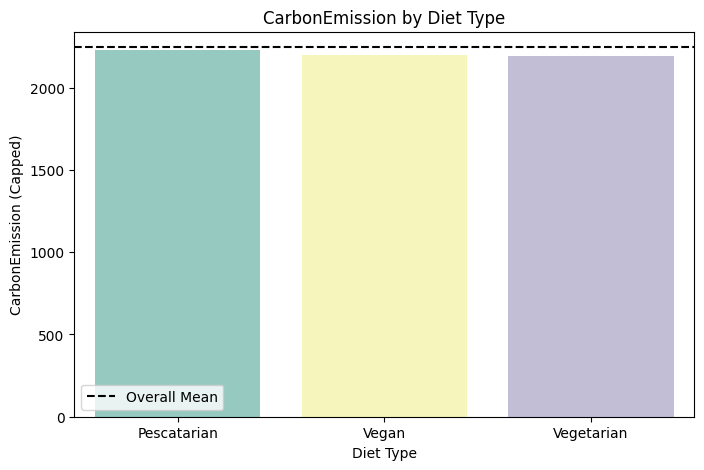

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=labels,
    y=data_plot,
    palette="Set3"
)

plt.axhline(data["CarbonEmission"].mean(), color='black', linestyle='--', label='Overall Mean')
plt.title("CarbonEmission by Diet Type")
plt.xlabel("Diet Type")
plt.ylabel("CarbonEmission (Capped)")
plt.legend()
plt.show()

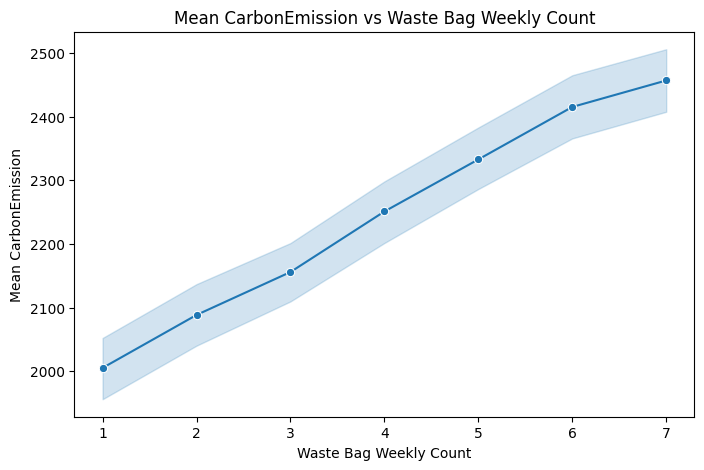

In [56]:
plt.figure(figsize=(8,5))
sns.lineplot(
    data=data,
    x="Waste Bag Weekly Count",
    y="CarbonEmission",
    marker="o"
)
plt.xlabel("Waste Bag Weekly Count")
plt.ylabel("Mean CarbonEmission")
plt.title("Mean CarbonEmission vs Waste Bag Weekly Count")
plt.show()

In [57]:
# Select numeric columns
numeric_for_corr = data.select_dtypes(include=[np.number])

# Compute correlation
corr = numeric_for_corr.corr(numeric_only=True)


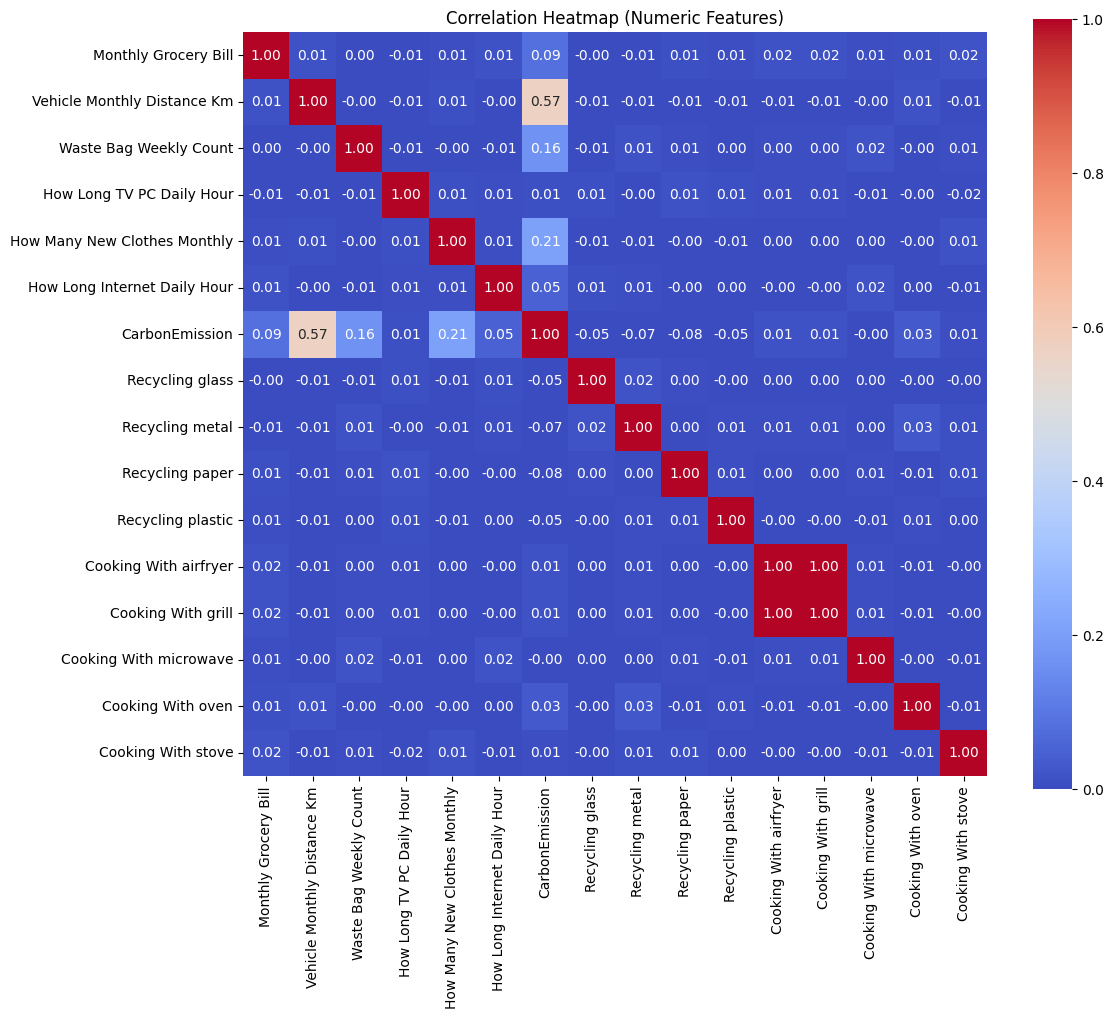

In [58]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,fmt=".2f",cmap='coolwarm',vmin=0, vmax=1, cbar=True,square=True)

plt.title("Correlation Heatmap (Numeric Features)")
plt.show()